# Torino City Noise and Crowd data EDA

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

# Noise Data

In [2]:
from parse_noise import read_noise_csv, combine_date_hour
# Load the noise csvs


from pathlib import Path

noise_path = Path("data/noise")

noise_dfs = []

for file in noise_path.iterdir():
    print(file)
    noise_dfs.append(
        read_noise_csv(file)
    )
    
# Process the CSVs
for df in noise_dfs:
    df["combined_datetime"] = df.apply(combine_date_hour, axis=1)

data/noise/2018.csv
data/noise/2016.csv
data/noise/2017.csv
data/noise/2019.csv


In [3]:
noise_df = pd.concat(noise_dfs)
noise_df = noise_df.sort_values("combined_datetime")

In [4]:
noise_df.head()

,Data,Ora,C1,C2,C3,C4,C5,combined_datetime,C5`
0,01-06-2016,00:00,"61,1","58,8","63,7","60,4","60,2",2016-06-01 00:00:00,NaN
1,01-06-2016,01:00,"57,2","56,1","60,4","57,7","58,4",2016-06-01 01:00:00,NaN
2,01-06-2016,02:00,"52,5","53,4","52,9","56,7","56,5",2016-06-01 02:00:00,NaN
3,01-06-2016,03:00,"50,6","46,6","45,7","47,9","55,6",2016-06-01 03:00:00,NaN
4,01-06-2016,04:00,"47,4","46,2","45,1","45,8","56,8",2016-06-01 04:00:00,NaN


In [5]:
from parse_noise import convert_float

y_cols = ['C1', 'C2', 'C3', 'C4', 'C5']

for y_col in y_cols:
    noise_df[y_col] = noise_df[y_col].map(convert_float)

In [6]:
# Making sure all datetimes are present
noise_df["combined_datetime"].isna().value_counts()

False    31416
Name: combined_datetime, dtype: int64

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

## All Noise data over time

array([<AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>,
       <AxesSubplot:xlabel='combined_datetime'>], dtype=object)

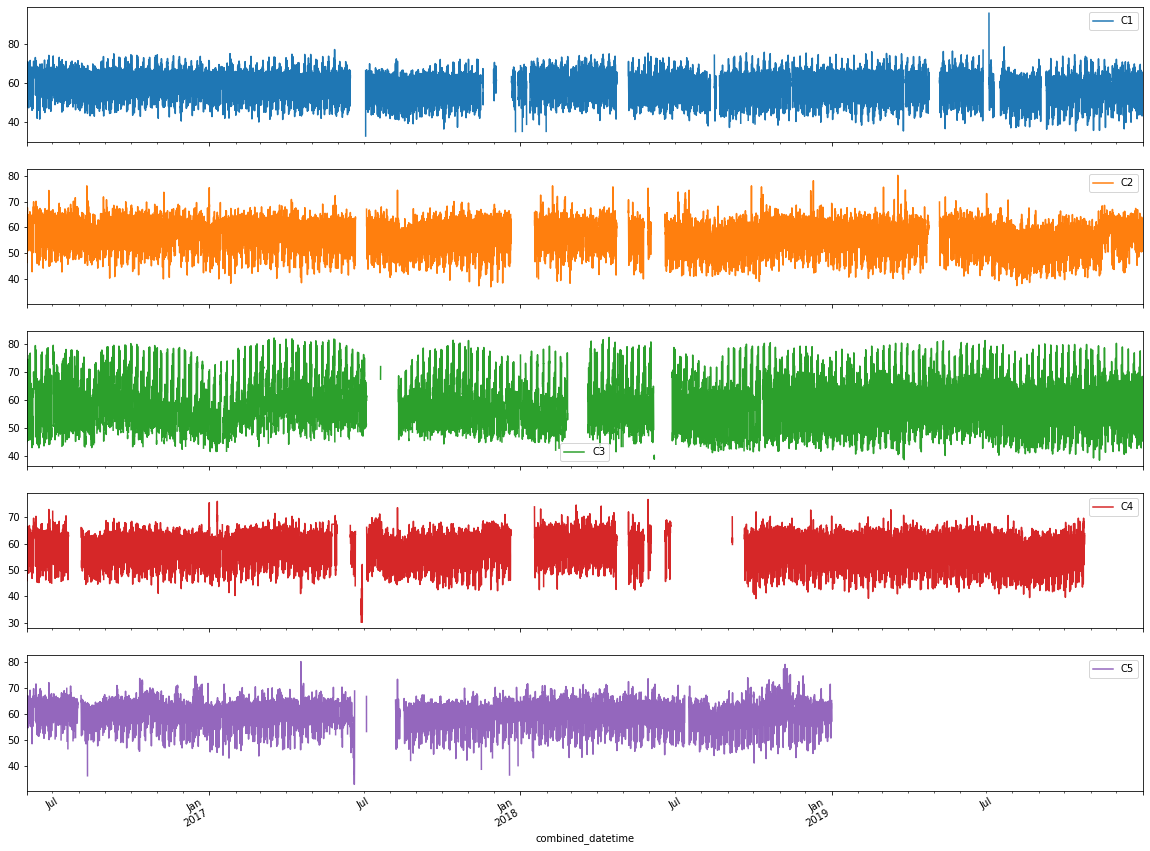

In [8]:
import seaborn as sns

noise_df.plot(x="combined_datetime", y=y_cols, figsize=(20,16), subplots=True)

In [9]:
from datetime import datetime

noise_df["year"] = noise_df.combined_datetime.map(lambda s: s.year)
noise_df["month"] = noise_df.combined_datetime.map(lambda s: s.month)
noise_df["day_name"] = noise_df.combined_datetime.map(lambda s: s.day_name())
noise_df["hour"] = noise_df.Ora.map(lambda s: datetime.strptime(s,"%H:%M").hour)
noise_df["weekday"] = noise_df.combined_datetime.map(lambda s:s.weekday())
noise_df.head()

,Data,Ora,C1,C2,C3,C4,C5,combined_datetime,C5`,year,month,day_name,hour,weekday
0,01-06-2016,00:00,61.1,58.8,63.7,60.4,60.2,2016-06-01 00:00:00,NaN,2016,6,Wednesday,0,2
1,01-06-2016,01:00,57.2,56.1,60.4,57.7,58.4,2016-06-01 01:00:00,NaN,2016,6,Wednesday,1,2
2,01-06-2016,02:00,52.5,53.4,52.9,56.7,56.5,2016-06-01 02:00:00,NaN,2016,6,Wednesday,2,2
3,01-06-2016,03:00,50.6,46.6,45.7,47.9,55.6,2016-06-01 03:00:00,NaN,2016,6,Wednesday,3,2
4,01-06-2016,04:00,47.4,46.2,45.1,45.8,56.8,2016-06-01 04:00:00,NaN,2016,6,Wednesday,4,2


## Average Noise Recorded Per Month

<AxesSubplot:title={'center':'Average noise recorded per month'}, xlabel='month'>

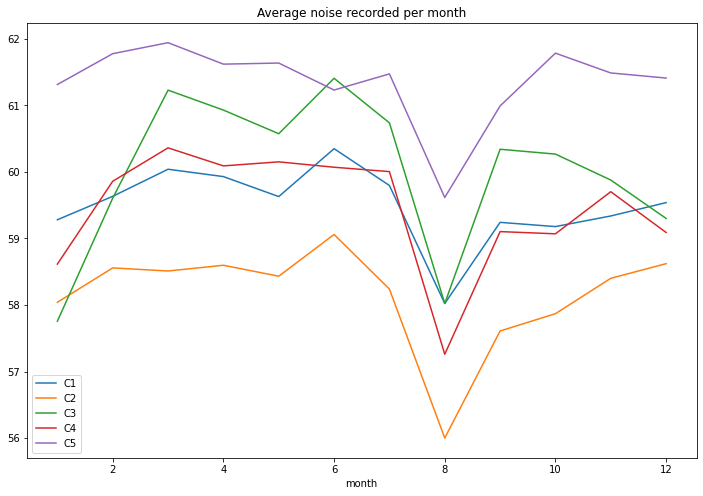

In [10]:
noise_df.groupby("month")[y_cols].agg("mean").plot(title="Average noise recorded per month", figsize=(12,8))

## Average Noise recorded per day of the Week

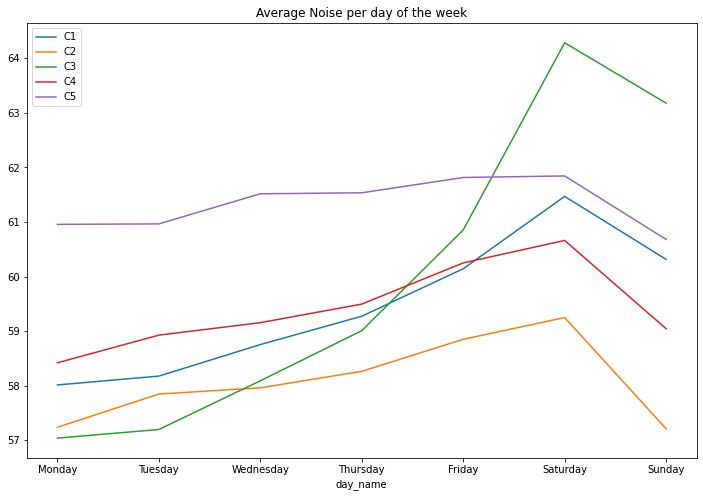

In [11]:
noise_day_agg = noise_df.groupby("day_name")[y_cols].agg("mean")

ax = noise_day_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).plot(figsize=(12,8), title="Average Noise per day of the week")

In [12]:
noise_day_agg

,C1,C2,C3,C4,C5
day_name,,,,,
Friday,60.142263,58.849940,60.852785,60.249169,61.814139
Monday,58.013952,57.237264,57.039645,58.419377,60.955286
Saturday,61.467762,59.248497,64.281982,60.660932,61.842596
Sunday,60.314744,57.211580,63.175773,59.043918,60.679465
Thursday,59.272454,58.262666,59.008289,59.495018,61.533941
Tuesday,58.175709,57.847080,57.197644,58.926253,60.964067
Wednesday,58.753532,57.961441,58.089839,59.154505,61.515650


## Average Hourly Noise

Text(0.5, 1.0, 'Average Hourly Noise')

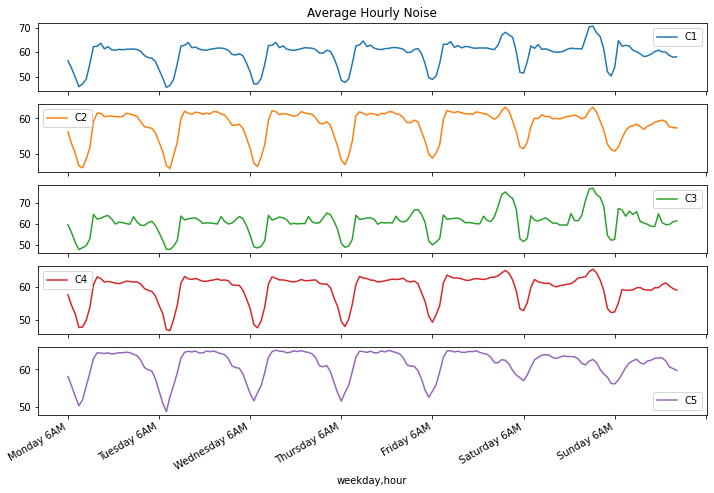

In [13]:
noise_df_hourly = noise_df.groupby(["weekday", "hour"])[y_cols].agg("mean")
# noise_df_hourly = noise_df_hourly.melt(["weekday","hour"])


ax = noise_df_hourly.plot(subplots=True, figsize=(12,8))

ax[-1].set_xticklabels(
    [
        "",
        "Monday 6AM",
        "Tuesday 6AM",
        "Wednesday 6AM",
        "Thursday 6AM",
        "Friday 6AM",
        "Saturday 6AM",
        "Sunday 6AM",
        "",
        ""
    ]
)
ax[0].set_title("Average Hourly Noise")

## Wifi Data

In [14]:
wifi_data = pd.read_csv("data/crowd_wifi/Rock_crowd.csv")
wifi_data.head()

,Time,No. of Visitors
0,2018-10-24 17:00,47
1,2018-10-24 18:00,155
2,2018-10-24 19:00,181
3,2018-10-24 20:00,211
4,2018-10-24 21:00,239


In [15]:
wifi_data.columns

Index(['Time', 'No. of Visitors'], dtype='object')

## Wifi time series data

<AxesSubplot:title={'center':'Wifi visitor data'}, xlabel='Time'>

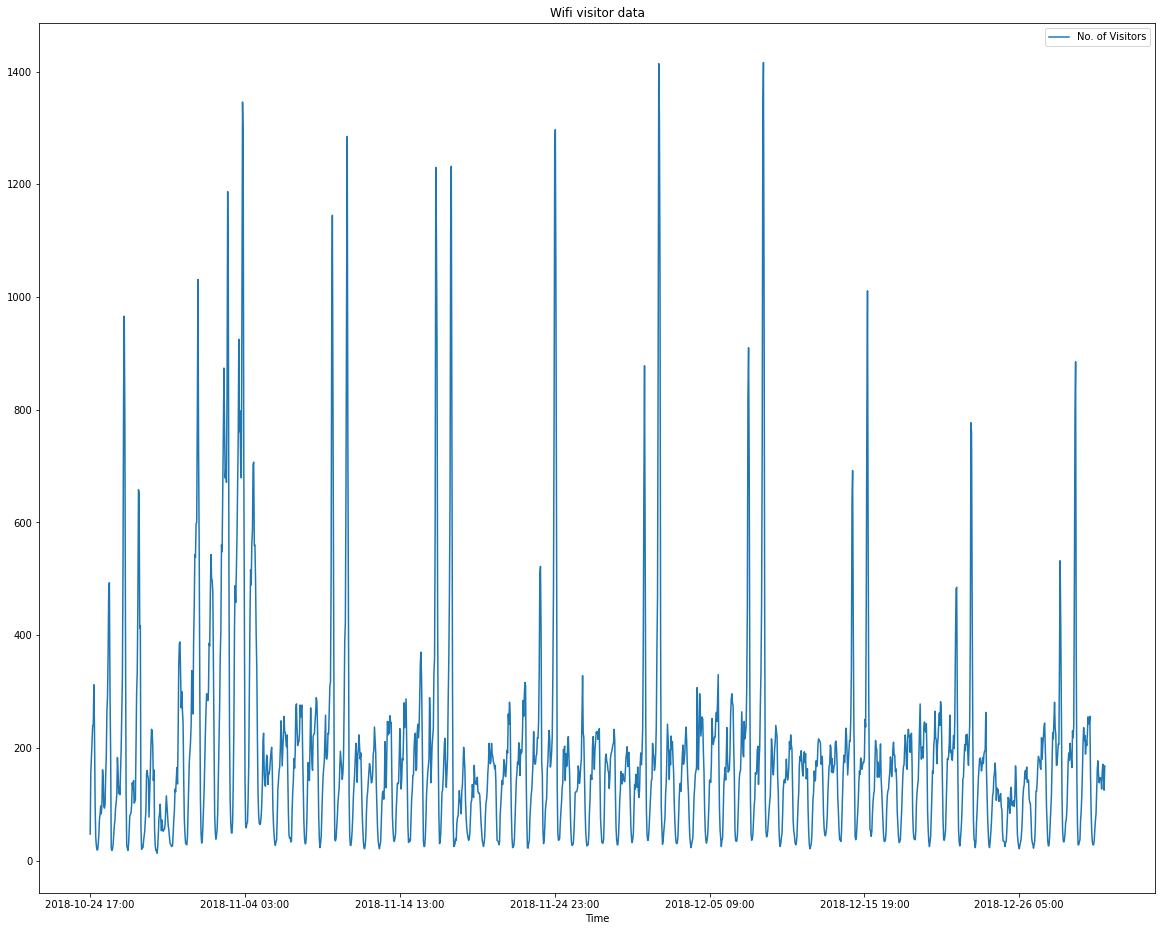

In [16]:
wifi_data.plot(x="Time", y="No. of Visitors", figsize=(20,16), title="Wifi visitor data")

In [17]:
from datetime import datetime

wifi_data["time"] = wifi_data.Time.map(
    lambda s: datetime.strptime(s, "%Y-%m-%d %H:%M")
)

In [18]:
wifi_data["day_name"] = wifi_data.time.map(lambda s : s.day_name())

In [19]:
wifi_data.head()

,Time,No. of Visitors,time,day_name
0,2018-10-24 17:00,47,2018-10-24 17:00:00,Wednesday
1,2018-10-24 18:00,155,2018-10-24 18:00:00,Wednesday
2,2018-10-24 19:00,181,2018-10-24 19:00:00,Wednesday
3,2018-10-24 20:00,211,2018-10-24 20:00:00,Wednesday
4,2018-10-24 21:00,239,2018-10-24 21:00:00,Wednesday


## Aggregated Wifi visitors data

<AxesSubplot:title={'center':'Average wifi visitors per day of the week'}, xlabel='day_name'>

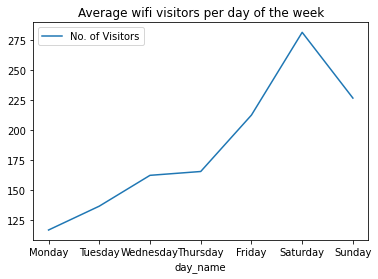

In [20]:
wifi_weekday_agg = wifi_data[["day_name", "No. of Visitors"]].groupby("day_name").agg("mean")

wifi_weekday_agg = wifi_weekday_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

wifi_weekday_agg.plot(title="Average wifi visitors per day of the week")

In [21]:
wifi_weekday_agg

,No. of Visitors
day_name,
Monday,116.983333
Tuesday,136.847222
Wednesday,162.515695
Thursday,165.708333
Friday,212.695833
Saturday,281.595833
Sunday,226.841667


### Relation between Noise and Wifi Visitors

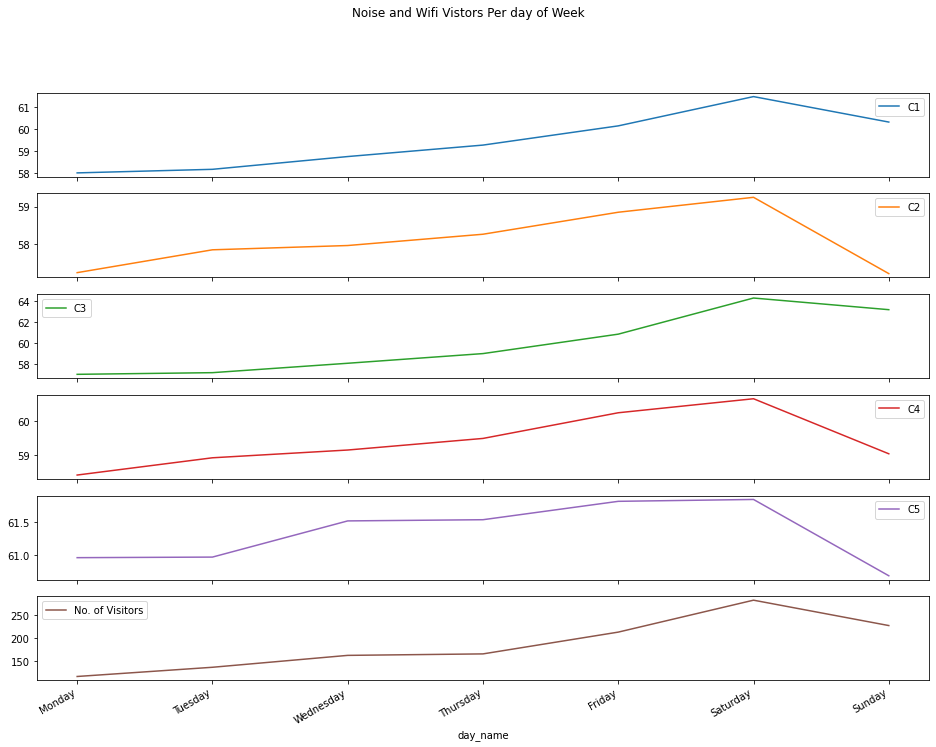

In [22]:
noise_wifi_visitors = noise_day_agg.merge(wifi_weekday_agg, on="day_name").reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
noise_wifi_visitors

ax = noise_wifi_visitors.plot(subplots=True, figsize=(16,12), title="Noise and Wifi Vistors Per day of Week")

In [23]:
noise_wifi_visitors.corr()

,C1,C2,C3,C4,C5,No. of Visitors
C1,1.000000,0.638949,0.973792,0.842827,0.473662,0.991173
C2,0.638949,1.000000,0.457675,0.947999,0.922930,0.628645
C3,0.973792,0.457675,1.000000,0.704496,0.264899,0.973525
C4,0.842827,0.947999,0.704496,1.000000,0.833024,0.829553
C5,0.473662,0.922930,0.264899,0.833024,1.000000,0.447339
No. of Visitors,0.991173,0.628645,0.973525,0.829553,0.447339,1.000000


# Sim Data

In [24]:
sim_path = Path("data/crowd_sim")

sim_dfs = []

for file in sim_path.iterdir():
    sim_dfs.append(
        pd.read_csv(file, delimiter=";")
    )
    
sim_df = pd.concat(sim_dfs)

In [25]:
sim_df.head()

,cluster,data_da,data_a,numero_presenze,layer_id,layer_nome,dettaglio(secondi)
0,Presenze,2017-10-15T21:00:00Z,2017-10-15T22:00:00Z,2848,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
1,Presenze,2017-10-15T20:00:00Z,2017-10-15T21:00:00Z,2846,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
2,Presenze,2017-10-15T19:00:00Z,2017-10-15T20:00:00Z,2822,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
3,Presenze,2017-10-15T18:00:00Z,2017-10-15T19:00:00Z,2717,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600
4,Presenze,2017-10-15T17:00:00Z,2017-10-15T18:00:00Z,2535,5491d6d2-0c9e-47b7-bfde-c84c632efacc,Area 1,3600


In [26]:
sim_df.shape

(15098, 7)

In [27]:
from datetime import datetime

In [28]:
sim_df["end_time"] = sim_df.data_a.map(lambda s: datetime.strptime(s, "%Y-%m-%dT%H:%M:%SZ"))


## Sim Card Time series data

<AxesSubplot:title={'center':'Sim card data'}, xlabel='end_time', ylabel='numero_presenze'>

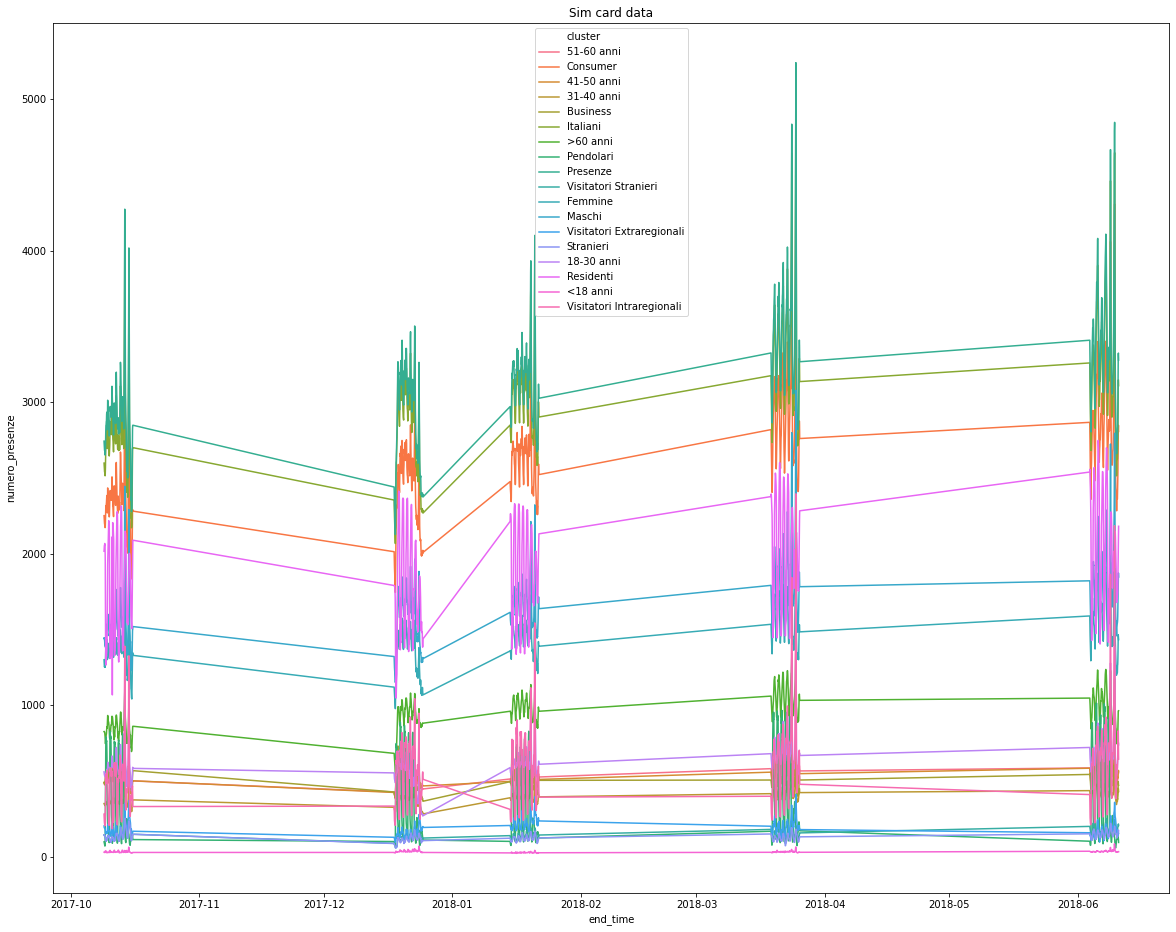

In [29]:
sim_df = sim_df.sort_values("end_time")
import seaborn as sns

from matplotlib import pyplot

fig, ax  = pyplot.subplots(figsize=(20,16))
ax.set_title("Sim card data")
sns.lineplot(
    x="end_time", y="numero_presenze", hue="cluster", data=sim_df
)

<AxesSubplot:title={'center':'Total Presence of Simcards'}, xlabel='end_time'>

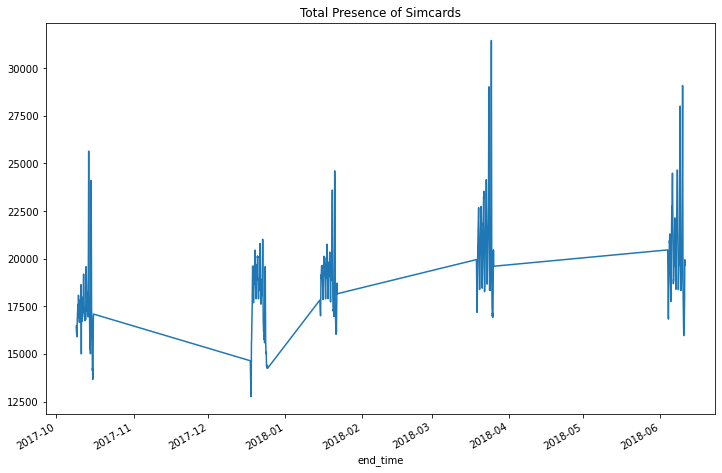

In [30]:
a = sim_df.groupby("end_time")["numero_presenze"].agg("sum")

a.plot(kind="line", figsize=(12,8), title="Total Presence of Simcards")

In [31]:
sim_df["year"] = sim_df.end_time.map(lambda s: s.year)
sim_df["month"] = sim_df.end_time.map(lambda s: s.month)
sim_df["day_name"] = sim_df.end_time.map(lambda s: s.day_name())
sim_df["day"] = sim_df.end_time.map(lambda s: s.day)

<AxesSubplot:title={'center':'Sim cards in December 2017'}, xlabel='end_time', ylabel='numero_presenze'>

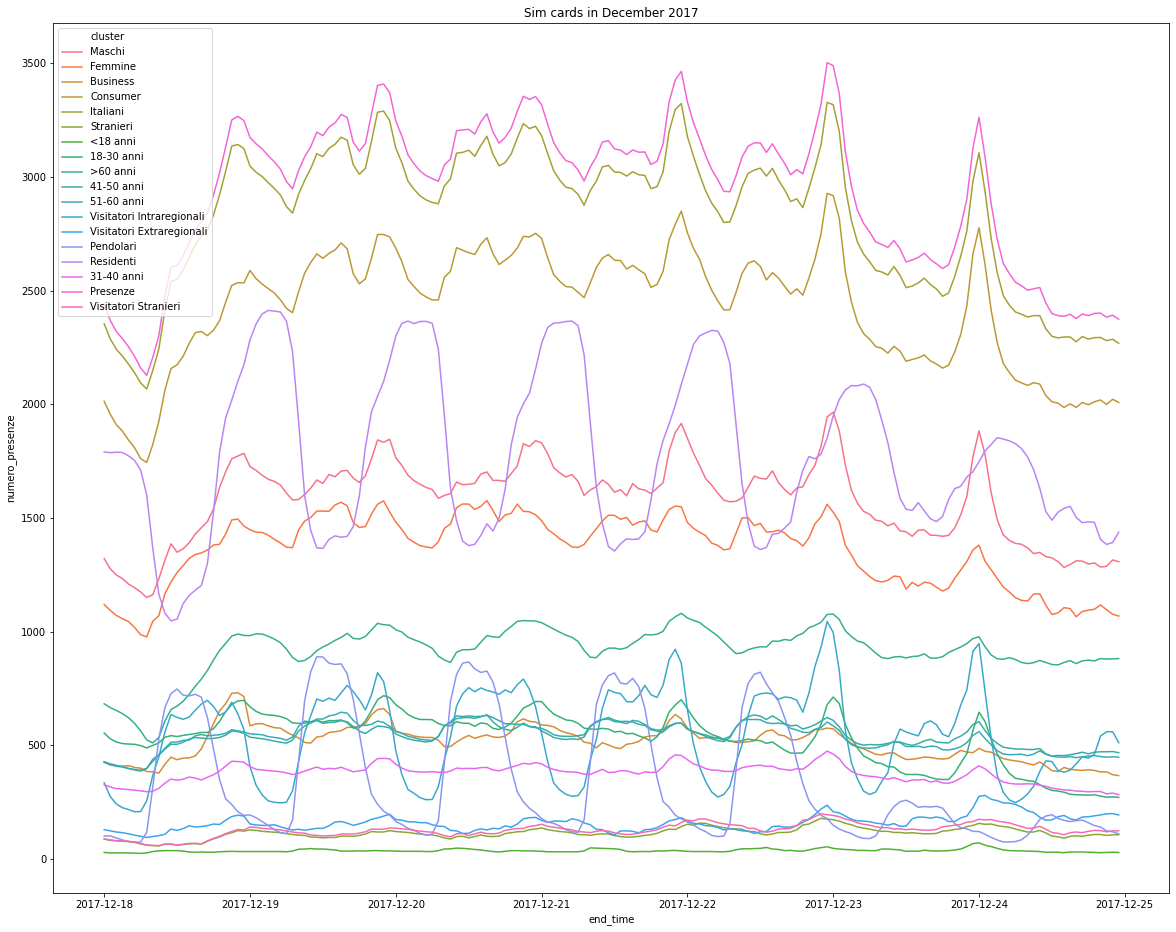

In [32]:
sub = sim_df[sim_df.end_time.map(lambda s: s.year==2017 and s.month==12)]

fig, ax = pyplot.subplots(figsize=(20,16))
ax.set_title("Sim cards in December 2017")

sns.lineplot(x="end_time", y="numero_presenze", hue="cluster", data=sub)

In [33]:
sim_df_summed = sim_df.groupby(["year", "month", "day_name"], as_index=False).agg("mean")
sim_df_summed.month.unique()

array([10, 12,  1,  3,  6])

## Average number of sim cards recorded per week

<AxesSubplot:xlabel='day_name', ylabel='numero_presenze'>

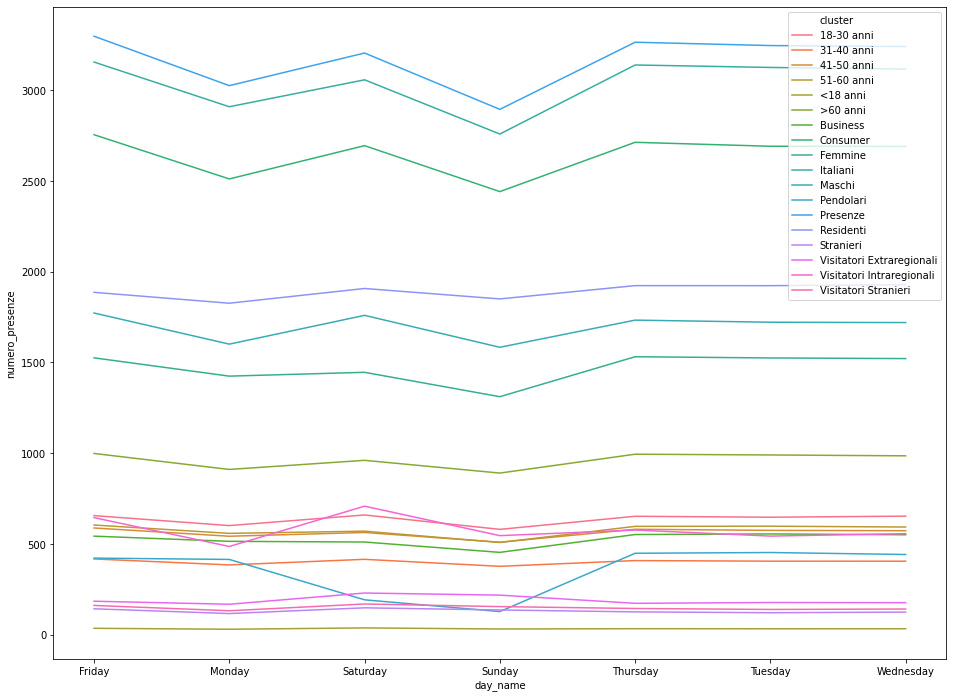

In [34]:
sim_cluster_presence_weekday = sim_df[["day_name", "numero_presenze", "cluster"]].groupby(["cluster","day_name"], as_index=False).agg("mean")

fig, ax = plt.subplots(
    figsize=(16,12)
)

sns.lineplot(
    y="numero_presenze", x="day_name", hue="cluster", ax=ax, data=sim_cluster_presence_weekday
)

## Average No. of sim cards recorded per month

<AxesSubplot:title={'center':'Average Sim cards recorded per month'}, xlabel='month'>

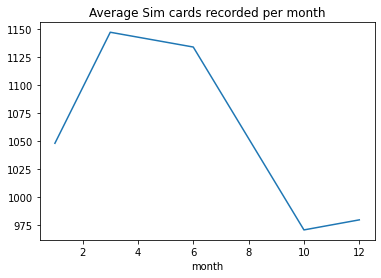

In [35]:
sim_df.groupby("month")["numero_presenze"].agg("mean").plot(title="Average Sim cards recorded per month")

# Police Complaints
- Only 25% of the police complaints have a time of complaint attached to them
- Only 20 complaints in the area and area around sensors have a `time` to them

In [36]:
complaints_path = Path("data/police_complaints/")



complaints_dfs = []

for file in complaints_path.iterdir():
    print(file)
    complaints_dfs.append(
        pd.read_csv(file, encoding="ISO-8859-1") 
    )

complaints_df = pd.concat(complaints_dfs)
complaints_df["Localita"] = complaints_df.Localita.map(lambda s: s.strip() if isinstance(s,str) else s)
complaints_df.head()

data/police_complaints/OpenDataContact_Luglio_Dicembre_2018.csv
data/police_complaints/OpenDataContact_Luglio_Dicembre_2017.csv
data/police_complaints/OpenDataContact_Gennaio_Giugno_2019.csv
data/police_complaints/OpenDataContact_Gennaio_Giugno_2018.csv


,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora
0,Allarme Sociale,Altro,8.0,D'AZEGLIO/MASSIMO (CORSO),NaN,16/07/2018,NaN
1,Allarme Sociale,Altro,1.0,REGINA MARGHERITA/(CORSO),NaN,17/07/2018,NaN
2,Allarme Sociale,Altro,10.0,DUINO/(VIA),NaN,14/09/2018,NaN
3,Allarme Sociale,Altro,NaN,NaN,NaN,02/10/2018,9.40
4,Allarme Sociale,Altro,9.0,CARDUCCI/GIOSUE' (PIAZZA),NaN,27/11/2018,11.53


In [37]:
complaints_df.shape

(4332, 7)

In [38]:
complaints_df.Localita.unique()

array(["D'AZEGLIO/MASSIMO (CORSO)", 'REGINA MARGHERITA/(CORSO)',
       'DUINO/(VIA)', ..., 'LIMONE/(VIA)', 'PORRI/VINCENZO (VIA)',
       'GESSI/ROMOLO (VIA)'], dtype=object)

In [39]:
complaints_df.date = complaints_df.Data.map(
    lambda s: datetime.strptime(s, "%d/%m/%Y")
)
complaints_df["day_name"] = complaints_df.date.map(lambda s: s.day_name())
complaints_df["month"] = complaints_df.date.map(lambda s: s.month)
complaints_df["year"] = complaints_df.date.map(lambda s: s.year)
complaints_df["day"] = complaints_df.date.map(lambda s: s.day)
complaints_df["weekday"] = complaints_df.date.map(lambda s: s.weekday())

/home/shikhar/.conda/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [40]:
# complaints_df.to_csv("data/police_complaints/combined.csv")

In [41]:
complaints_df.Ora.map(lambda s: np.isnan(s)).mean()

0.7490766389658357

In [42]:
complaints_time_agg = complaints_df.sort_values(["year", "month","day"]).groupby(["year", "month", "day"])[["year", "month"]].agg("count")

complaints_time_agg

year  month
year month day             
2017 7     1       2      2
           3       4      4
           4       4      4
           5       6      6
           6      10     10
...              ...    ...
2019 6     25      7      7
           26      6      6
           27      9      9
           28      2      2
           29      3      3

[651 rows x 2 columns]

## Average Complaints per day in Torino

<AxesSubplot:title={'center':'Average Complaints per day in Torino'}, xlabel='day_name'>

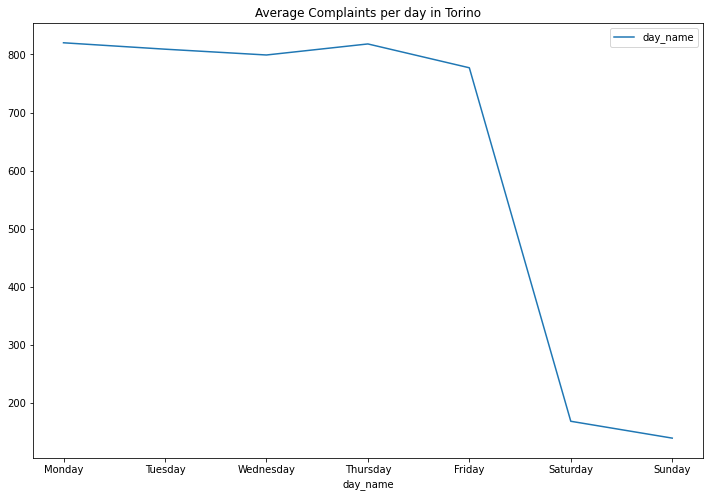

In [43]:
complaints_df.groupby("day_name")["day_name"].agg("count").to_frame().reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).plot(title="Average Complaints per day in Torino", figsize=(12,8))

Police complaints are filtered for the following streets:
- SALUZZO/(VIA)
- BARETTI/GIUSEPPE (VIA)
- PRINCIPE TOMMASO/(VIA)
- MARCONI/GUGLIELMO (CORSO)
- GIACOSA/GIUSEPPE (VIA)
- MADAMA CRISTINA/(VIA)
- S. ANSELMO/(VIA)
- MADAMA CRISTINA/(PIAZZA)
- MADAMA CRISTINA/(VIA)
- ORMEA/(VIA)
- BELFIORE/(VIA)
- MORGARI/ODDINO (VIA)

These streets surround the sensors.

In [44]:
street_names = [
    "SALUZZO/(VIA)",
    "BARETTI/GIUSEPPE (VIA)",
    "PRINCIPE TOMMASO/(VIA)",
    "MARCONI/GUGLIELMO (CORSO)",
    "GIACOSA/GIUSEPPE (VIA)",
    "MADAMA CRISTINA/(VIA)",
    "S. ANSELMO/(VIA)",
    "MADAMA CRISTINA/(PIAZZA)",
    "MADAMA CRISTINA/(VIA)",
    "ORMEA/(VIA)",
    "BELFIORE/(VIA)",
    "MORGARI/ODDINO (VIA)"
]

In [45]:
complaints_df_sub = complaints_df[
    complaints_df.Localita.isin(street_names)
]

In [46]:
print("Total Complaints around the area of San Salvario" , complaints_df_sub.shape)

Total Complaints around the area of San Salvario (71, 12)


In [47]:
complaints_count = complaints_df_sub["Sottocategoria Criminologica"].value_counts().to_frame().rename(columns={"Sottocategoria Criminologica": "Counts"})
complaints_count.head()
complaints_count["English"] = ["Other",
"Urban decay and decor",
"Local disturbances",
"Harassing Behavior",
"Loud noises",
"Dog Disorders"]

## Different kinds of Complaints in and around the location of Sensors

<AxesSubplot:title={'center':'Distribution of complaint counts near sensors'}, xlabel='English'>

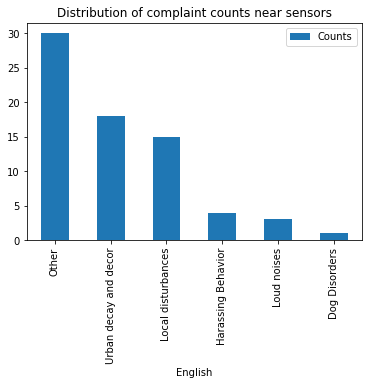

In [48]:
complaints_count.plot(kind="bar", x="English", title="Distribution of complaint counts near sensors")

## No of complaints per day near the sesnors

<AxesSubplot:title={'center':'No.of complaints per day near sensors'}, xlabel='day_name'>

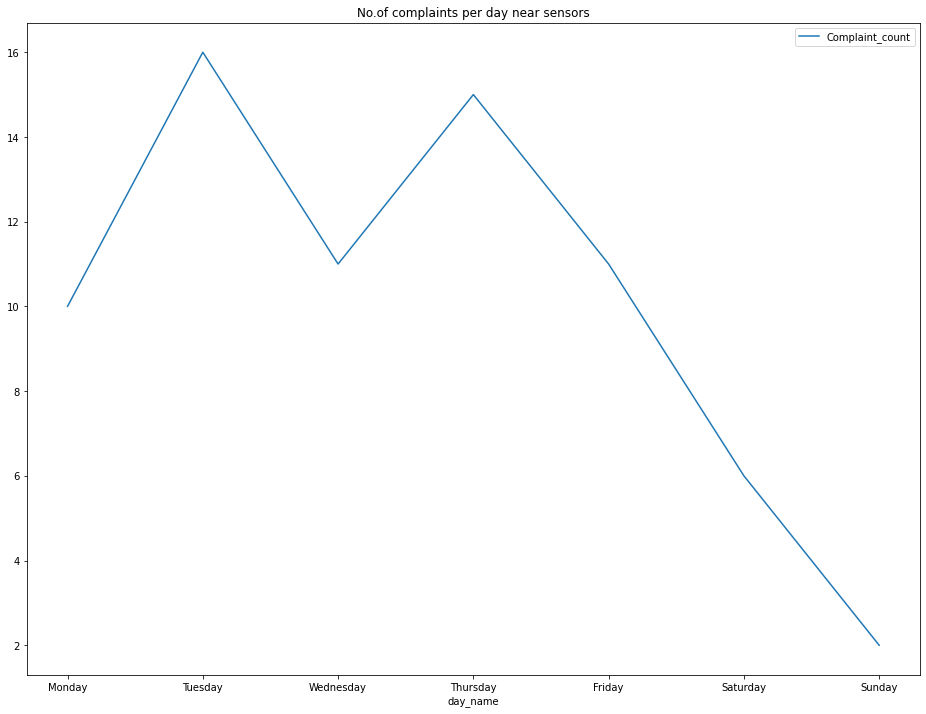

In [49]:
complaint_counts_agg = complaints_df_sub.groupby("day_name")[["day_name"]].agg("count").rename(columns={"day_name": "Complaint_count"})

complaint_counts_agg = complaint_counts_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

complaint_counts_agg.plot(
    title="No.of complaints per day near sensors", figsize=(16,12)
)

In [50]:
complaints_df['Sottocategoria Criminologica'].unique()

array(['Altro', 'Atti di vandalismo', 'Comportamenti molesti',
       'Disturbi altri animali', 'Disturbi Cani', 'Disturbi da locali',
       'Rumori molesti', 'Uso improprio parti comuni',
       'Decoro e degrado urbano', 'Veicoli abbandonati',
       'Aggregazioni giovanili'], dtype=object)

<AxesSubplot:>

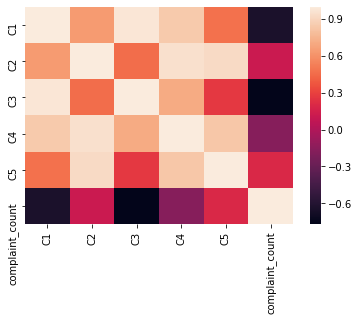

In [51]:
noise_day_agg["complaint_count"] = complaint_counts_agg
sns.heatmap(noise_day_agg.corr())

In [52]:
# ax = noise_day_agg.plot(kind="line", subplots=True, figsize=(12,8))
# noise_day_agg.plot.scatter(x="C1", y="complaint_count", ax=ax)

In [53]:
noise_day_agg

,C1,C2,C3,C4,C5,complaint_count
day_name,,,,,,
Friday,60.142263,58.849940,60.852785,60.249169,61.814139,11
Monday,58.013952,57.237264,57.039645,58.419377,60.955286,10
Saturday,61.467762,59.248497,64.281982,60.660932,61.842596,6
Sunday,60.314744,57.211580,63.175773,59.043918,60.679465,2
Thursday,59.272454,58.262666,59.008289,59.495018,61.533941,15
Tuesday,58.175709,57.847080,57.197644,58.926253,60.964067,16
Wednesday,58.753532,57.961441,58.089839,59.154505,61.515650,11


## Complaint Count and average noise are negatively correlated

Incomplete police data, or the compaliners are also drinking

<AxesSubplot:xlabel='C1', ylabel='complaint_count'>

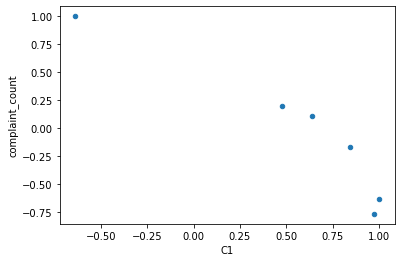

In [54]:
noise_day_police_corr = noise_day_agg.corr()
noise_day_police_corr
noise_day_police_corr[["C1", "complaint_count"]].plot(kind="scatter", x="C1",y="complaint_count")

In [55]:
complaints_sub_with_time = complaints_df_sub[complaints_df_sub.Ora.map(
    lambda s: not np.isnan(s)
)]

complaints_sub_with_time["hour"] = complaints_sub_with_time.Ora.map(
    lambda p: datetime.strptime(str(p), "%H.%M").hour
)

complaints_sub_with_time["minute"] = complaints_sub_with_time.Ora.map(
    lambda p: datetime.strptime(str(p), "%H.%M").minute
)

/home/shikhar/.conda/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shikhar/.conda/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [56]:
complaints_sub_with_time

,Categoria criminologa,Sottocategoria Criminologica,Circoscrizione,Localita,Area Verde,Data,Ora,day_name,month,year,day,weekday,hour,minute
41,Convivenza Civile,Altro,8.0,GIACOSA/GIUSEPPE (VIA),NaN,24/07/2018,12.21,Tuesday,7,2018,24,1,12,21
348,Convivenza Civile,Disturbi da locali,8.0,PRINCIPE TOMMASO/(VIA),NaN,09/08/2018,11.44,Thursday,8,2018,9,3,11,44
441,Convivenza Civile,Rumori molesti,8.0,S. ANSELMO/(VIA),NaN,10/08/2018,13.54,Friday,8,2018,10,4,13,54
536,QualitÃ Urbana,Altro,8.0,ORMEA/(VIA),NaN,06/08/2018,10.32,Monday,8,2018,6,0,10,32
617,QualitÃ Urbana,Altro,8.0,SALUZZO/(VIA),NaN,22/10/2018,8.28,Monday,10,2018,22,0,8,28
620,QualitÃ Urbana,Altro,8.0,MADAMA CRISTINA/(VIA),NaN,23/10/2018,11.05,Tuesday,10,2018,23,1,11,5
782,QualitÃ Urbana,Decoro e degrado urbano,8.0,MADAMA CRISTINA/(VIA),NaN,14/08/2018,11.52,Tuesday,8,2018,14,1,11,52
472,Convivenza Civile,Disturbi da locali,8.0,BELFIORE/(VIA),NaN,21/10/2017,10.00,Saturday,10,2017,21,5,10,0
660,Qualità Urbana,Altro,8.0,MADAMA CRISTINA/(PIAZZA),NaN,10/10/2017,8.08,Tuesday,10,2017,10,1,8,8
97,Convivenza Civile,Altro,8.0,MADAMA CRISTINA/(VIA),NaN,05/03/2019,11.23,Tuesday,3,2019,5,1,11,23


In [57]:
complaint_sub_agg = complaints_sub_with_time.groupby("day_name")[["day_name"]].agg("count").rename(columns={"day_name": "Complaint_count"})

complaint_sub_agg = complaint_sub_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

In [58]:
noise_day_agg["complaint_count_time"] = complaint_sub_agg
noise_day_agg = noise_day_agg.fillna(0)

noise_day_agg.head()

,C1,C2,C3,C4,C5,complaint_count,complaint_count_time
day_name,,,,,,,
Friday,60.142263,58.849940,60.852785,60.249169,61.814139,11,4.0
Monday,58.013952,57.237264,57.039645,58.419377,60.955286,10,3.0
Saturday,61.467762,59.248497,64.281982,60.660932,61.842596,6,1.0
Sunday,60.314744,57.211580,63.175773,59.043918,60.679465,2,0.0
Thursday,59.272454,58.262666,59.008289,59.495018,61.533941,15,2.0


## Average noise levels with complaint( with time) counts

Text(0.5, 1.0, 'Noise levels with number of complaints( with time)')

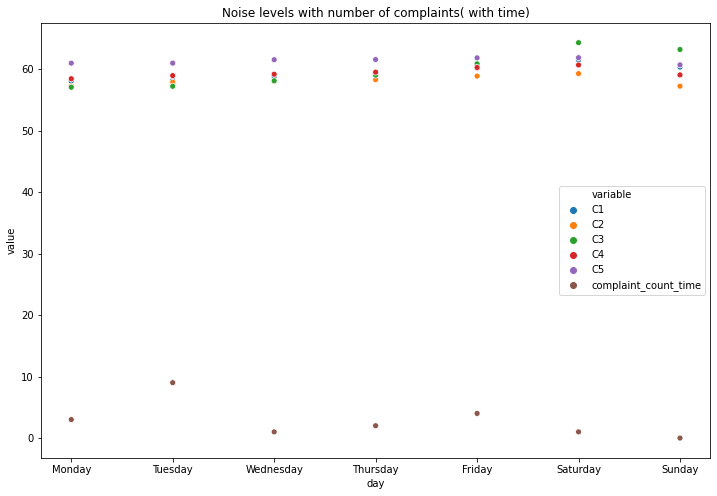

In [59]:
noise_day_agg["day"] = noise_day_agg.index
d = noise_day_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)[["C1", "C2", "C3", "C4", "C5", "day","complaint_count_time"]].melt(
    "day"
)
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(
    x="day",
    y="value",
    hue="variable",
    data=d,
    ax=ax
)

ax.set_title("Noise levels with number of complaints( with time)")

Text(0.5, 1.0, 'Noise levels with number of complaints(all)')

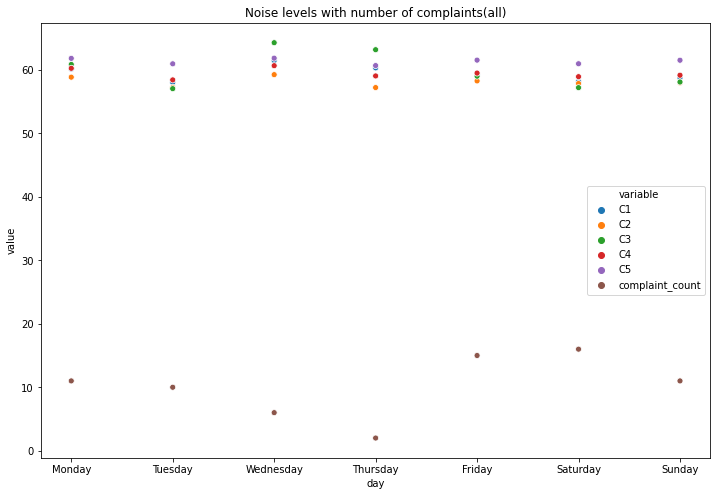

In [60]:

noise_day_agg["day"] = noise_day_agg.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).index
d = noise_day_agg[["C1", "C2", "C3", "C4", "C5", "day","complaint_count"]].melt(
    "day"
)
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(
    x="day",
    y="value",
    hue="variable",
    data=d,
    ax=ax
)

ax.set_title("Noise levels with number of complaints(all)")

In [61]:
noise_day_agg

,C1,C2,C3,C4,C5,complaint_count,complaint_count_time,day
day_name,,,,,,,,
Friday,60.142263,58.849940,60.852785,60.249169,61.814139,11,4.0,Monday
Monday,58.013952,57.237264,57.039645,58.419377,60.955286,10,3.0,Tuesday
Saturday,61.467762,59.248497,64.281982,60.660932,61.842596,6,1.0,Wednesday
Sunday,60.314744,57.211580,63.175773,59.043918,60.679465,2,0.0,Thursday
Thursday,59.272454,58.262666,59.008289,59.495018,61.533941,15,2.0,Friday
Tuesday,58.175709,57.847080,57.197644,58.926253,60.964067,16,9.0,Saturday
Wednesday,58.753532,57.961441,58.089839,59.154505,61.515650,11,1.0,Sunday


In [62]:
noise_day_agg

,C1,C2,C3,C4,C5,complaint_count,complaint_count_time,day
day_name,,,,,,,,
Friday,60.142263,58.849940,60.852785,60.249169,61.814139,11,4.0,Monday
Monday,58.013952,57.237264,57.039645,58.419377,60.955286,10,3.0,Tuesday
Saturday,61.467762,59.248497,64.281982,60.660932,61.842596,6,1.0,Wednesday
Sunday,60.314744,57.211580,63.175773,59.043918,60.679465,2,0.0,Thursday
Thursday,59.272454,58.262666,59.008289,59.495018,61.533941,15,2.0,Friday
Tuesday,58.175709,57.847080,57.197644,58.926253,60.964067,16,9.0,Saturday
Wednesday,58.753532,57.961441,58.089839,59.154505,61.515650,11,1.0,Sunday


Text(0.5, 1.0, 'Complaints(with time) counted per hour')

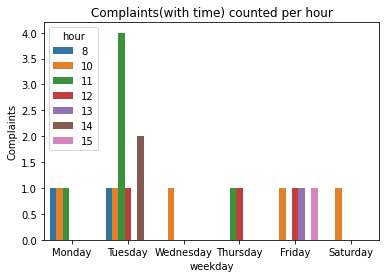

In [63]:
d  =complaints_sub_with_time.sort_values("weekday").groupby(["weekday","hour"])[["hour"]].agg("count").rename(
    columns={"hour":"Complaints"}
)
d["hour"] = [e[1] for e in d.index]
d["weekday"] = [e[0] for e in d.index]
d1 = d[["Complaints", "hour", "weekday"]].melt(["weekday","hour"])

ax = sns.barplot(
    x="weekday",
    y="value",
    hue="hour",
    data=d1
)

ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_ylabel("Complaints")
ax.set_title("Complaints(with time) counted per hour")

In [64]:
d

Complaints  hour  weekday
weekday hour                           
0       8              1     8        0
        10             1    10        0
        11             1    11        0
1       8              1     8        1
        10             1    10        1
        11             4    11        1
        12             1    12        1
        14             2    14        1
2       10             1    10        2
3       11             1    11        3
        12             1    12        3
4       10             1    10        4
        12             1    12        4
        13             1    13        4
        15             1    15        4
5       10             1    10        5

## Average Hourly Noise and Complaint counts(with time)

Text(0.5, 1.0, 'Average Hourly Noise')

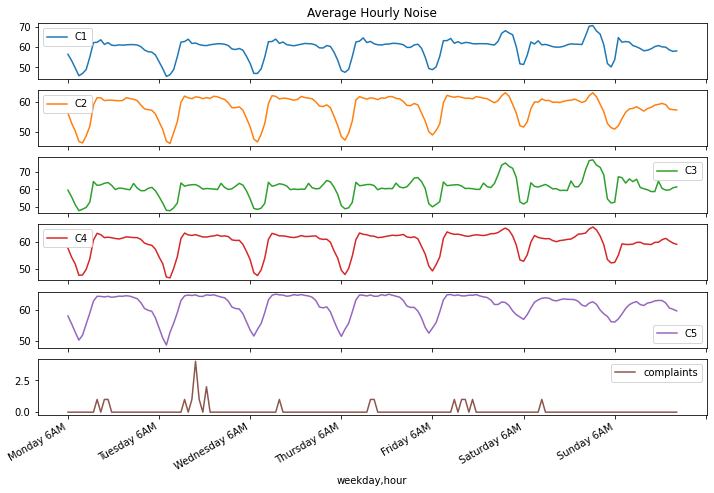

In [65]:
noise_df_hourly["complaints"] = d["Complaints"]
noise_df_hourly = noise_df_hourly.fillna(0)
ax = noise_df_hourly.plot(subplots=True, figsize=(12,8))

ax[-1].set_xticklabels(
    [
        "",
        "Monday 6AM",
        "Tuesday 6AM",
        "Wednesday 6AM",
        "Thursday 6AM",
        "Friday 6AM",
        "Saturday 6AM",
        "Sunday 6AM",
        "",
        ""
    ]
)
ax[0].set_title("Average Hourly Noise")

## Loud Noise

In [66]:
loud_noise_df = noise_df[
    (noise_df.C1 >= 70) | (noise_df.C2 >= 70) | (noise_df.C3 >= 70) | (noise_df.C4 >= 70) | (noise_df.C5 >= 70)
]
loud_noise_df

,Data,Ora,C1,C2,C3,C4,C5,combined_datetime,C5`,year,month,day_name,hour,weekday
23,01-06-2016,23:00,69.1,63.2,72.5,64.9,63.1,2016-06-01 23:00:00,NaN,2016,6,Wednesday,23,2
24,02-06-2016,00:00,70.0,63.7,74.5,66.5,62.7,2016-06-02 00:00:00,NaN,2016,6,Thursday,0,3
25,02-06-2016,01:00,70.8,61.5,71.1,65.0,62.3,2016-06-02 01:00:00,NaN,2016,6,Thursday,1,3
70,03-06-2016,22:00,64.8,60.0,70.0,62.7,62.1,2016-06-03 22:00:00,NaN,2016,6,Friday,22,4
71,03-06-2016,23:00,68.4,63.0,75.3,65.7,63.0,2016-06-03 23:00:00,NaN,2016,6,Friday,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8663,27-12-2019,23:00,63.8,62.9,71.8,NaN,NaN,2019-12-27 23:00:00,NaN,2019,12,Friday,23,4
8686,28-12-2019,22:00,64.9,58.2,71.8,NaN,NaN,2019-12-28 22:00:00,NaN,2019,12,Saturday,22,5
8687,28-12-2019,23:00,69.4,59.0,77.5,NaN,NaN,2019-12-28 23:00:00,NaN,2019,12,Saturday,23,5
8688,29-12-2019,00:00,67.4,59.4,75.5,NaN,NaN,2019-12-29 00:00:00,NaN,2019,12,Sunday,0,6


(0.0, 20.0)

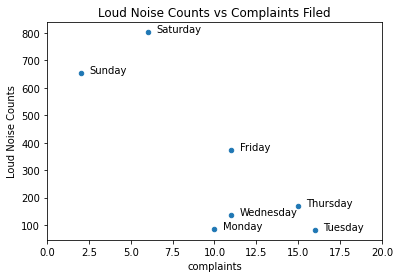

In [67]:
loud_noise_df_day = loud_noise_df["day_name"].value_counts()
loud_noise_df_day = loud_noise_df_day.to_frame().rename(columns={"day_name":"Loud Noise Counts"})


loud_noise_df_day["complaints"] = noise_day_agg["complaint_count"]
ax = loud_noise_df_day.plot(
    kind="scatter", x="complaints", y="Loud Noise Counts"
)

for x,y, day in zip(loud_noise_df_day.complaints.to_list(), loud_noise_df_day["Loud Noise Counts"].to_list(), loud_noise_df_day.index.to_list()):
    ax.text(
        x+0.5, y, day
    )
    
ax.set_title("Loud Noise Counts vs Complaints Filed")
ax.set_xlim(0,20)

In [68]:

loud_noise_df_day

,Loud Noise Counts,complaints
Saturday,803,6
Sunday,654,2
Friday,374,11
Thursday,170,15
Wednesday,137,11
Monday,86,10
Tuesday,82,16


## Loud Noise in particular hours( 6PM to 6AM )

(0.0, 20.0)

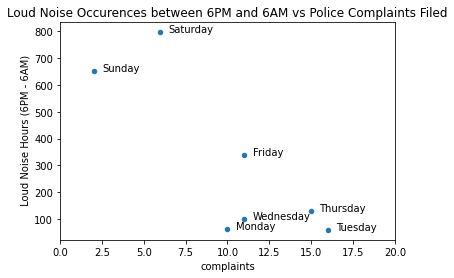

In [69]:
loud_noise_hour = noise_df[
    (noise_df.C1 >= 70) | (noise_df.C2 >= 70) | (noise_df.C3 >= 70) | (noise_df.C4 >= 70) | (noise_df.C5 >= 70) &
    (((noise_df.hour >= 16) & (noise_df.hour <= 6)) | ((noise_df.hour >= 0) & (noise_df.hour <= 6)) )
]


loud_noise_hour = loud_noise_hour.day_name.value_counts().to_frame().rename(columns={"day_name": "Loud Noise hours"})
loud_noise_hour["complaints"] = noise_day_agg["complaint_count"]

loud_noise_hour = loud_noise_hour.reindex(
    index=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ax = loud_noise_hour.plot(kind="scatter", x="complaints", y="Loud Noise hours")
ax.set_ylabel(" Loud Noise Hours (6PM - 6AM)")

for x,y, day in zip(loud_noise_hour.complaints.to_list(), loud_noise_hour["Loud Noise hours"].to_list(), loud_noise_hour.index.to_list()):
    ax.text(
        x+0.5, y, day
    )
    
ax.set_title("Loud Noise Occurences between 6PM and 6AM vs Police Complaints Filed")
ax.set_xlim(0,20)

In [70]:
loud_noise_hour

,Loud Noise hours,complaints
Monday,63,10
Tuesday,59,16
Wednesday,101,11
Thursday,128,15
Friday,338,11
Saturday,797,6
Sunday,651,2


In [118]:
loud_noise_df["date"] = loud_noise_df.combined_datetime.map(
    lambda s: s.date()
)

loud_noise_agg = loud_noise_df.groupby("date")[y_cols].agg("max")

/home/shikhar/.conda/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [114]:
loud_noise_agg

,C1,C2,C3,C4,C5
date,,,,,
2016-06-01,69.1,63.2,72.5,64.9,63.1
2016-06-02,70.8,63.7,74.5,66.5,62.7
2016-06-03,68.4,63.0,75.3,65.7,63.0
2016-06-04,71.4,65.1,76.0,66.9,65.6
2016-06-05,69.9,63.4,76.7,65.5,63.0
...,...,...,...,...,...
2019-12-21,69.6,63.0,76.8,NaN,NaN
2019-12-22,69.6,61.9,76.0,NaN,NaN
2019-12-27,63.8,62.9,71.8,NaN,NaN


In [110]:
loud_noise_df.groupby("date")[["C1"]].agg("mean").head(10)

,C1
date,
2016-06-01,69.100000
2016-06-02,70.400000
2016-06-03,66.600000
2016-06-04,69.950000
2016-06-05,68.700000
2016-06-08,71.000000
2016-06-10,69.100000
2016-06-11,69.257143
2016-06-12,68.725000


In [105]:
complaints_df["date"] = complaints_df.date

In [134]:
noise_complaints.dropna()

,date,max_noise,complaints
256,2017-07-01,0.191357,-0.921321
258,2017-07-19,-1.282204,1.702102
259,2017-07-20,-1.101768,0.986623
260,2017-07-27,-0.921332,0.509637
261,2017-08-08,-1.011550,1.702102
...,...,...,...
652,2019-06-21,-0.440169,0.748130
654,2019-06-23,1.153682,-0.921321
655,2019-06-27,0.341720,0.748130
656,2019-06-28,0.883028,-0.921321


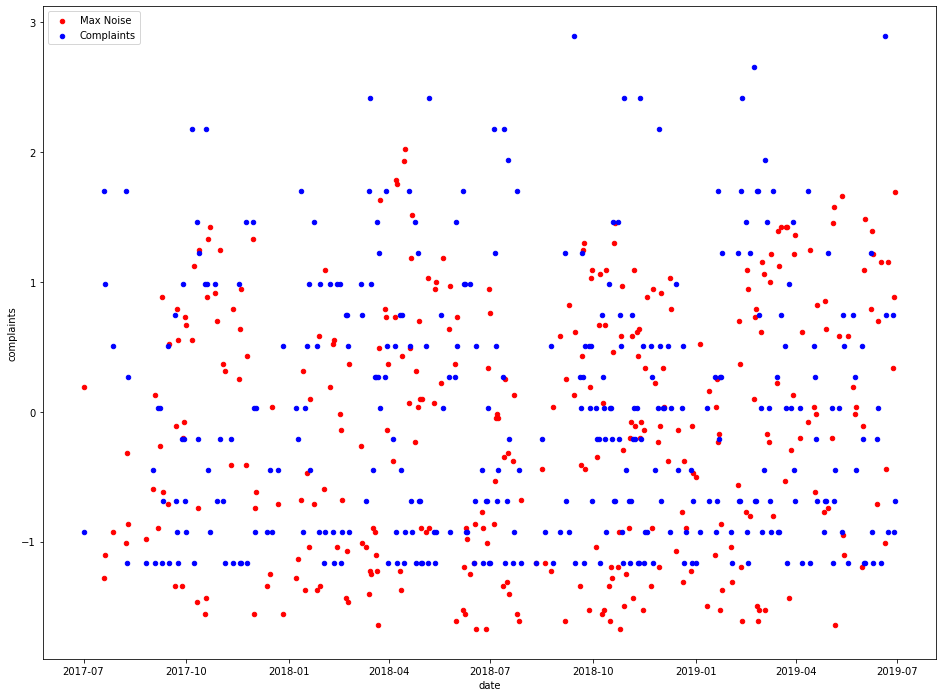

In [141]:
complaints_df_agg = complaints_df.groupby("date")["Data"].agg("count").to_frame().rename(columns={"Data": "complaints"})
# complaints_df_agg
noise_complaints = loud_noise_agg.max(axis=1).to_frame().rename(columns={0:"max_noise"}).join(complaints_df_agg).reset_index()
noise_complaints["max_noise"] = (noise_complaints["max_noise"] - noise_complaints["max_noise"].mean())/noise_complaints["max_noise"].std()
noise_complaints["complaints"] = (noise_complaints["complaints"] - noise_complaints["complaints"].mean())/noise_complaints["complaints"].std()

noise_complaints = noise_complaints.dropna()
ax = noise_complaints.plot(kind="scatter", x="date",y="max_noise", color="r", figsize=(16,12))
ax = noise_complaints.plot(kind="scatter", x="date",y="complaints", color="b", ax=ax)
ax.legend(["Max Noise", "Complaints"])
# sns.regplot(noise_complaints["max_noise"], noise_complaints["complaints"], ax=ax)

<AxesSubplot:xlabel='max_noise', ylabel='complaints'>

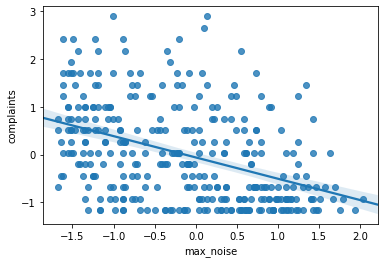

In [143]:
sns.regplot(noise_complaints["max_noise"], noise_complaints["complaints"])

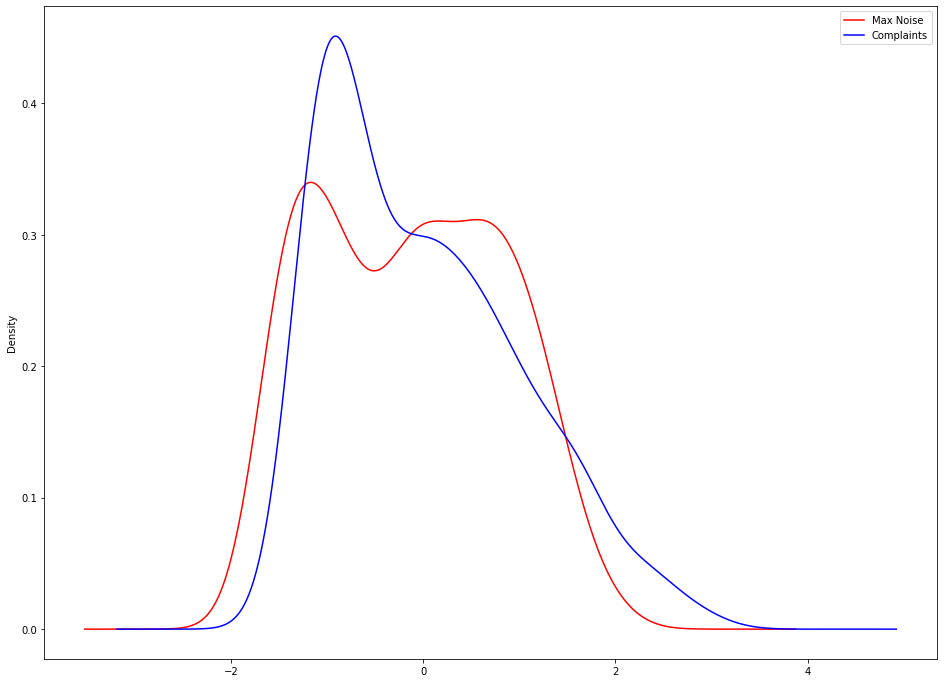

In [136]:
ax = noise_complaints.plot(kind="kde", x="date",y="max_noise", color="r", figsize=(16,12))
ax = noise_complaints.plot(kind="kde", x="date",y="complaints", color="b", ax=ax)
ax.legend(["Max Noise", "Complaints"])

In [138]:
noise_complaints.corr()

,max_noise,complaints
max_noise,1.000000,-0.428494
complaints,-0.428494,1.000000


In [139]:
noise_complaints

,date,max_noise,complaints
256,2017-07-01,0.191357,-0.921321
258,2017-07-19,-1.282204,1.702102
259,2017-07-20,-1.101768,0.986623
260,2017-07-27,-0.921332,0.509637
261,2017-08-08,-1.011550,1.702102
...,...,...,...
652,2019-06-21,-0.440169,0.748130
654,2019-06-23,1.153682,-0.921321
655,2019-06-27,0.341720,0.748130
656,2019-06-28,0.883028,-0.921321
